In [5]:
import pandas as pd

# Charger les émissions CO2 par km pour les différents transports
df_co2_transport = pd.read_excel("./Data/emission-de-co2e-par-voyageur-kilometre-sur-le-reseau.xlsx", sheet_name="Feuil1")

# Garde uniquement les colonnes utiles
df_transport_emission = df_co2_transport[["TransportMode", "Co2e_voy_km_mode (medias IDFM)"]].dropna().drop_duplicates()
df_transport_emission.columns = ["mode_transport", "co2_g_km"]
df_transport_emission.head()


,mode_transport,co2_g_km
0,metro,3.80
3,tram,3.20
4,rail,5.50
7,rail,6.60
10,rail,26.93


In [12]:
import pandas as pd

df = pd.read_csv('Data/Users.csv')

df.head()


,logement,surface_m2,chauffage,ampoules,lave_linge,lave_vaisselle,four,climatisation,nb_personnes,transport_mode,transport_km_semaine
0,appartement,102,electrique,10,1,1,0,0,6,velo,197
1,maison,78,electrique,16,1,0,1,1,3,marche,0
2,appartement,34,pompe à chaleur,5,1,0,1,1,1,voiture,47
3,appartement,121,gaz,20,0,1,1,1,5,velo,16
4,appartement,139,electrique,17,0,1,1,1,1,velo,101


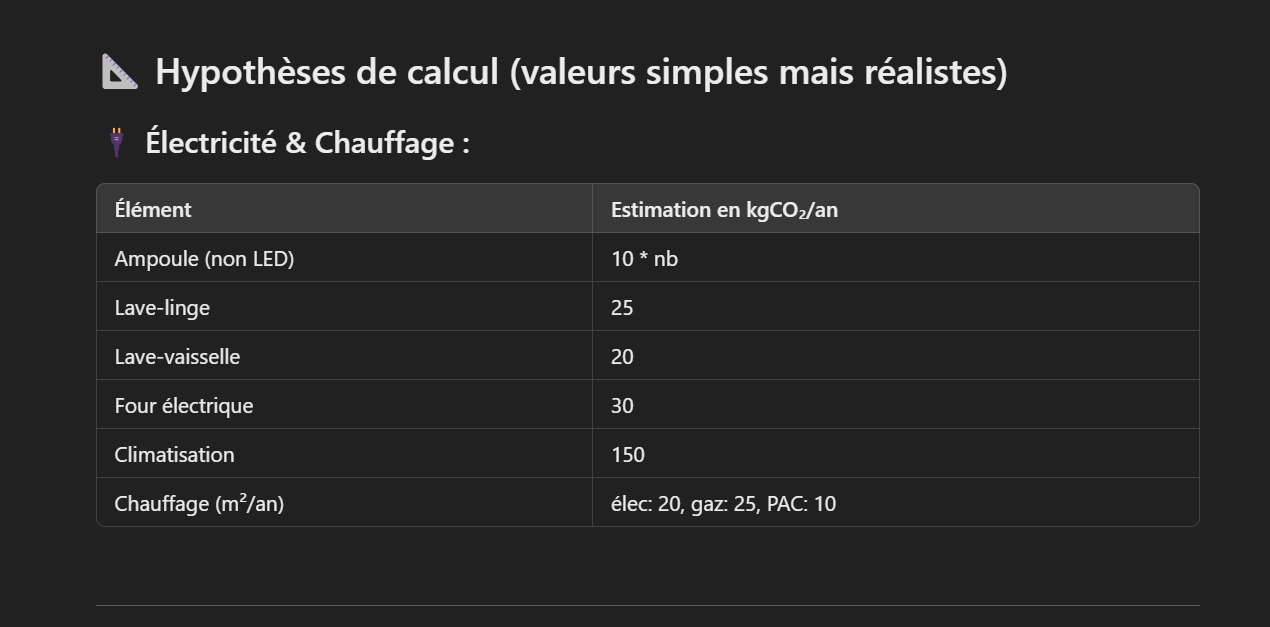

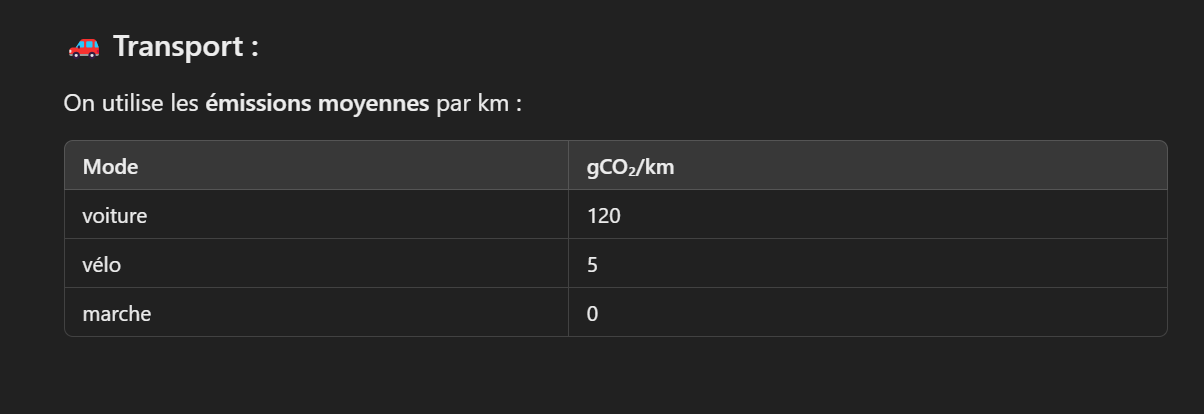

In [ ]:
import pandas as pd


df = pd.read_csv('Data/Users.csv')

# Fonction de calcul d'émission
def calculer_emissions_co2(row):
    co2_par_km = {"voiture": 120, "velo": 5, "marche": 0}
    km_annee = row["transport_km_semaine"] * 52
    transport_co2 = km_annee * co2_par_km.get(row["transport_mode"], 120) / 1000

    equip_co2 = (
        row["ampoules"] * 10 +
        row["lave_linge"] * 25 +
        row["lave_vaisselle"] * 20 +
        row["four"] * 30 +
        row["climatisation"] * 150
    )

    coef_chauffage = {"electrique": 20, "gaz": 25, "pompe à chaleur": 10}
    chauffage_co2 = row["surface_m2"] * coef_chauffage.get(row["chauffage"], 20)

    logement_total = (chauffage_co2 + equip_co2) / max(row["nb_personnes"], 1)
    return logement_total + transport_co2

# Ajouter la colonne d’estimation
df["estimation_kgCO2_an"] = df.apply(calculer_emissions_co2, axis=1)

# Sauvegarde dans un nouveau fichier
df.to_csv("Data/Users.csv", index=False)

print("✅ Fichier enrichi enregistré avec succès !")
df.head()



OSError: Cannot save file into a non-existent directory: 'chemin\vers'